# Gans Nedir?
Generative Adversarial Networks

Üretken Çekişmeli Ağlar. Eğitim setiyle aynı istatistiklere sahip yeni veriler oluşturmayı hedefleyen yapılardır. Burada bir dedektif var ve bir tane de kalpazan var. Burada bir dedektif var ve bir de kalpazanımız var. Gerçek bir datamız var ve bir tane de kalpazanımız(generator) var. Generator bir resim üretiyor ve real data ve fake data bir dedektife geliyor ve dedektif de bunlardan hangisi gerçek hangisi sahte anlamaya çalışıyor. Bu arada generator(kalpazan) giderek öğreniyor ve real dataya daha yakın sonuçlar öğretiyor. Böylece generator (kalpazan) eğitim setiyle yani gerçek datayla aynı istatistiğe sahip yeni veriler oluşturmayı öğreniyor. 



#### GANs nedir?


Bir seneryo içinde düşünelim. 2 network’dan oluşur.  Generator(Üretici ağ) ve Discriminator(Ayırt edici ağ) Generator için “G” Discriminator “D” diyelim.
G ağı bir output üretiyor D ise CNN olsun ANN olsun Deep learning ya da machine learning algoritmalarında gördüğümüz bir nevi “Classification” yöntemidir. Yani ayırt ediyor, sınıflandırıyor. Bunun ifadesi de şu şekilde oluyor, G için “kalpazan” deniyor D için “Dedektif” deniyor. G nin asıl amacı sürekli yeni data üretmekti. Yani 	üretici ağdı. Gerçeğinden ayırt edilemeyecek nihai datalar üretmektir. G ağı öncesinde hedeflenen de kötü veriler üretir fakat ardından gittikçe iyileşir ve real dataya yaklaşır. Zamanla discriminator de real mi değil mi diye karar verirken de öğrenir.

Discriminator’e Real Datayı etiketleyip ardından verilir. Ardından fake olan data etiketlenip verilir. Üretilen bu sahte data Generator tarafından gönderiliyor. Generator’ın “random_noise” kullanarak bir görüntü oluşturur. Ardıdan “disriminator”’un karar vermesi gereken bir süreç söz konusudur. Bu karar sürecinde back propagation kullanılarak “Discrimination” ‘a geri döner ve aynı zamanda “Generator” ‘ de öğrenmeye başlıyor. Zamanla “Discriminator”  ayırt edemeyecek hale gelecek.




##### Discriminator Training:

Noise -> Generator -> Image1 ->(labelladık y=0) -> Discriminator
                               Real_image (y=1)-> Discriminator
                               

İnputlar=======> Real+ Fake Data


Discriminator if fake y=0 if real y=1 karar verecek.


Ardıdan loss elde edeceğiz ve loss’ların toplamının model parametrelerine göre türevi ile backpropagation yapacağız. Ardından parametreler güncellenecek ve train edilmiş bir dataset elde edeceğiz. 



#### Generator Training:
Noise -> Generator -> image1(y=1 diye labellanmış) -> Discrimination -> Eğer ki  Discrimination fake derse backpropagation işlemi yapıyor -> Generator yine bir resim üretiyor. (Loss’lar sıfırlana kadar).

Generator ve Discrimination her ikisinde de neural network yapıları vardır. 





Dataset olarak 0-9 resimleri içeren Mnist Datasetini kullanacağız.

In [1]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [3]:
##normalizasyon -1-0 arasında 

x_train= (x_train.astype(np.float32)-127.5)/127.5

In [4]:
print(x_train.shape)

(60000, 28, 28)


Keras için shape'i bir vektöre çevireceğiz.

In [5]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1]*x_train.shape[2])
print(x_train.shape)

(60000, 784)


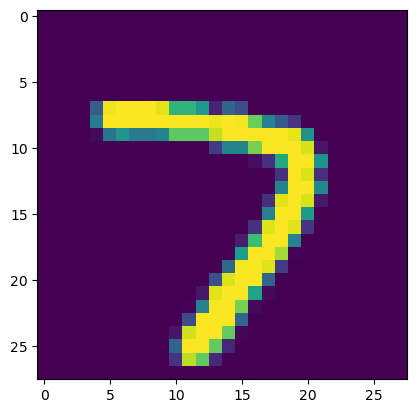

In [6]:
plt.imshow(x_test[17])

#### Create Generator

Burada genel hatlarıyla bir input değerimiz olacak ve arada bir Neural Network yapısı olacak ve son olarak bir output olacak.


Input-----> Dense(512)-----> ReLu-----> Dense(512)-----> ReLu--> Dense(1024)---->Relu---->Dense(784)(Output)---->tanh----->output

Bunu bir fonksiyon gibi yazacağız.

In [ ]:
def create_generator():
    
    
    generator= Sequential()
    generator.add(Dense(uints=512, input_dim=100))
    generator.add(ReLU())
    
    
    generator.add(Dense(uints=512))
    generator.add(reLU())
    
    
    generator.add(Dense(uints=1024))
    generator.add(reLU())
    
    
    generator.add(Dense(uints=774), activation="tanh")
     

    generator.compile(loss= "binary_corssentropy",
                     optimizer= Adam(lr= 0.0001,beta_1=0.5))
    return generator




Generator objesi yarattık.

In [ ]:
g = create_generator()

In [ ]:
g.summary()

Burada da discriminator tanımlayacağız. Adımları:

input----->Dense(1024)-----> ReLU+Droput(0.4)-----> Dense(512)----->Relu+Dropout()----->Dense(256)----->ReLu----->Dense()(output)-----> Sigmoid----->Output----->Fake or Real

In [ ]:
def create_discriminator():
    discriminator.Sequential()
    discriminator.add(Dense(uints=1024, input_dim=784))
    discriminator.add(ReLU)
    discriminator.add(Dropout(0.4))
    
    
    discriminator.add(Dense(units=512))
    discriminator.add(ReLU)
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units=256))
    discriminator.add(ReLU)
    
    discriminator.add(Dense(uints=1, activation="sigmoid"))
    
    
    discriminator.compile(loss= "binary_crossentropy",
                         optimizer= Adam(lr=0.0001, beta_1= 0.5))
    
    return discriminator
            

In [ ]:
d= create_discriminator()

In [ ]:
d.summary()

##### Gan oluşturma

In [ ]:
def create_gan(discriminator,generator):
    discriminator.trainable= False
    gan_input= Input(shape=(100,))
    x= generator(gan_input)
    gan_output= discriminator(x)
    
    gan= Model(inputs= gan_input, outputs= gan_outputs)
    
    gan.compile(loss= "binary_crossentropy",optimizer="adam")
    return gan
    

In [ ]:
gan= create(d,g)

In [ ]:
gan.summary()

##### Gan Train

In [1]:
epochs=50
batch_size= 256

In [ ]:
#train

epochs = 50
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        
        noise = np.random.normal(0,1, [batch_size,100])
        
        generated_images = g.predict(noise)
        
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0],size = batch_size)]
        
        x = np.concatenate([image_batch, generated_images])
        
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        
        d.trainable = True  #Eğitime başlandı.
        d.train_on_batch(x,y_dis)

        noise = np.random.normal(0,1,[batch_size,100])
        
        y_gen = np.ones(batch_size)
        
        d.trainable = False  #Artık generator'ü eğiteceğim için discriminator'ün eğitimini False'e eşitledim.
        
        gan.train_on_batch(noise, y_gen)
    print("epochs: ",e)

In [ ]:
# save model
g.save_weights('gans_model.h5')  # always save your weights after training or during training

In [ ]:
# visualize
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[66], interpolation='nearest')
plt.axis('off')
plt.show()